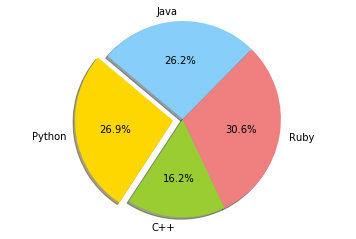

In [1]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Initialization Plots for Thesis

In [2]:
import EvolutionaryAlgorithm as EA
import ea_tools as ET
import plotly
plotly.__version__
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

/home/jonas/Dokumente/gitRepos/master_thesis/EvolutionaryAlgorithm/EvolutionaryAlgorithm.py:58: TqdmExperimentalWarning:

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)



In [38]:
def forward_normalized_score(key, matrix):
    sum_key = matrix.get_fw_sum(key)
    keys, values = matrix.get_forward_adjacent(key)
    normalized_values = EA.np.array([(values[i] / matrix.get_bw_sum(keys[i])) * (values[i] / sum_key) for i in range(len(keys))])
    sort = EA.np.argsort(-normalized_values)
    return keys[sort], normalized_values[sort]

def backward_normalized_score(key, matrix):
    sum_key = matrix.get_bw_sum(key)
    keys, values = matrix.get_backward_adjacent(key)
    normalized_values = EA.np.array([(values[i] / matrix.get_fw_sum(keys[i])) * (values[i] / sum_key) for i in range(len(keys))])
    sort = EA.np.argsort(-normalized_values)
    return keys[sort], normalized_values[sort]

def normalized_score(key, matrix):
    sum_key = matrix.get_sum(key)
    keys, values = matrix.get_adjacent(key)
    normalized_values = EA.np.array([(values[i] / matrix.get_sum(keys[i])) * (values[i] / sum_key) for i in range(len(keys))])
    sort = EA.np.argsort(-normalized_values)
    return keys[sort], normalized_values[sort]


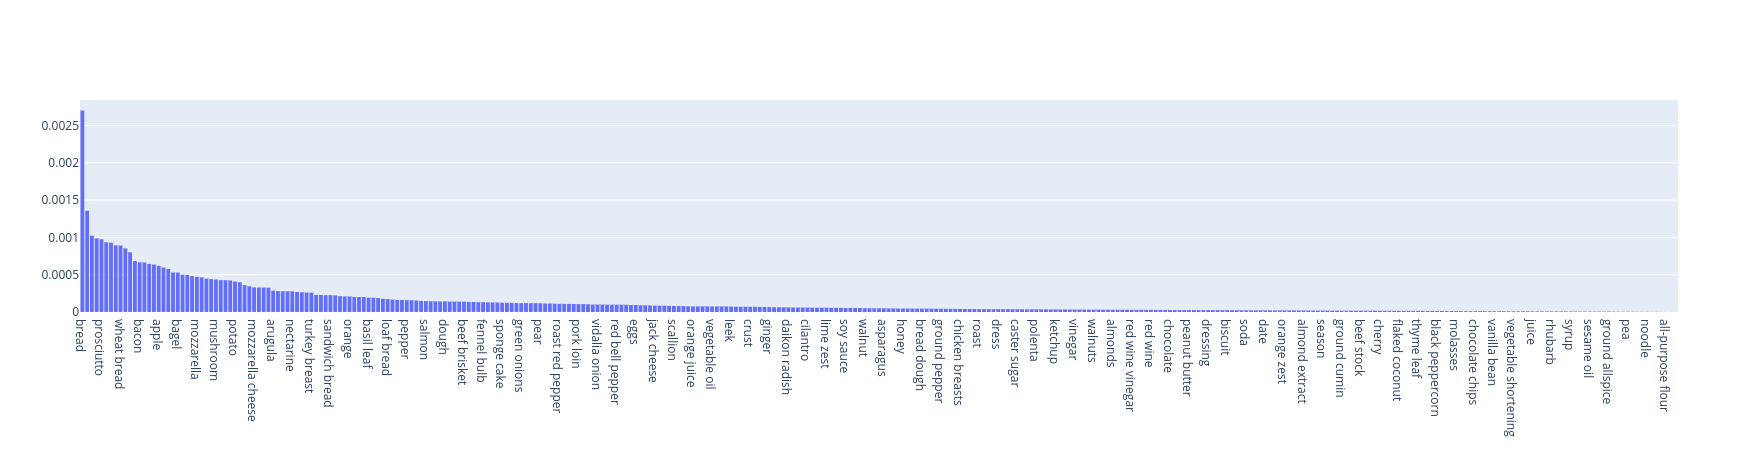

In [39]:
keys, values = forward_normalized_score("slice", EA.m_base_act)
data = go.Histogram(x=keys, y=values, histfunc="sum")
iplot([data])

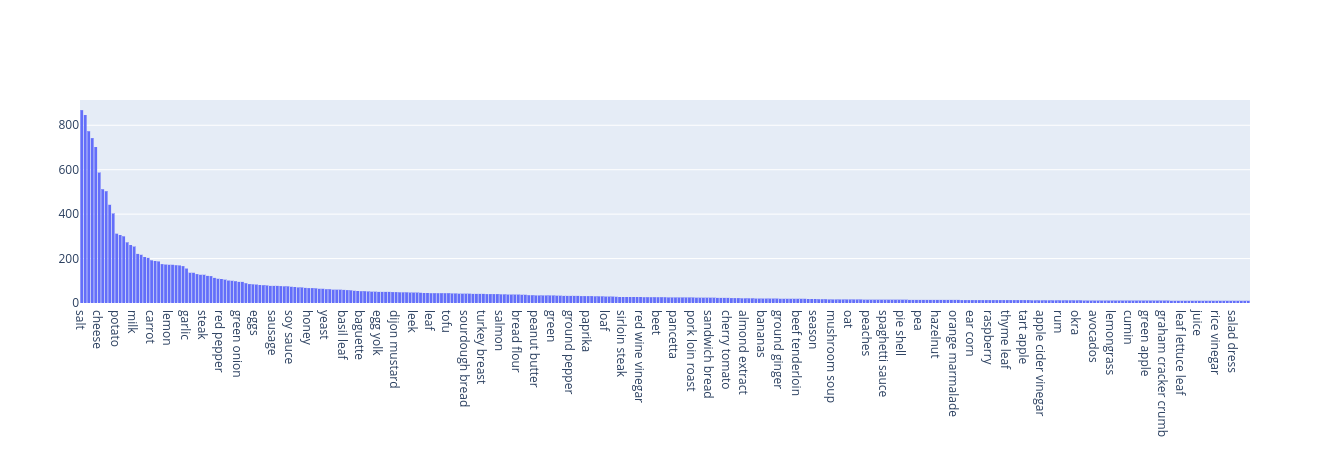

In [37]:
keys, values = EA.m_base_act.get_forward_adjacent('slice')
data = go.Histogram(x=keys, y=values, histfunc="sum")
iplot([data])

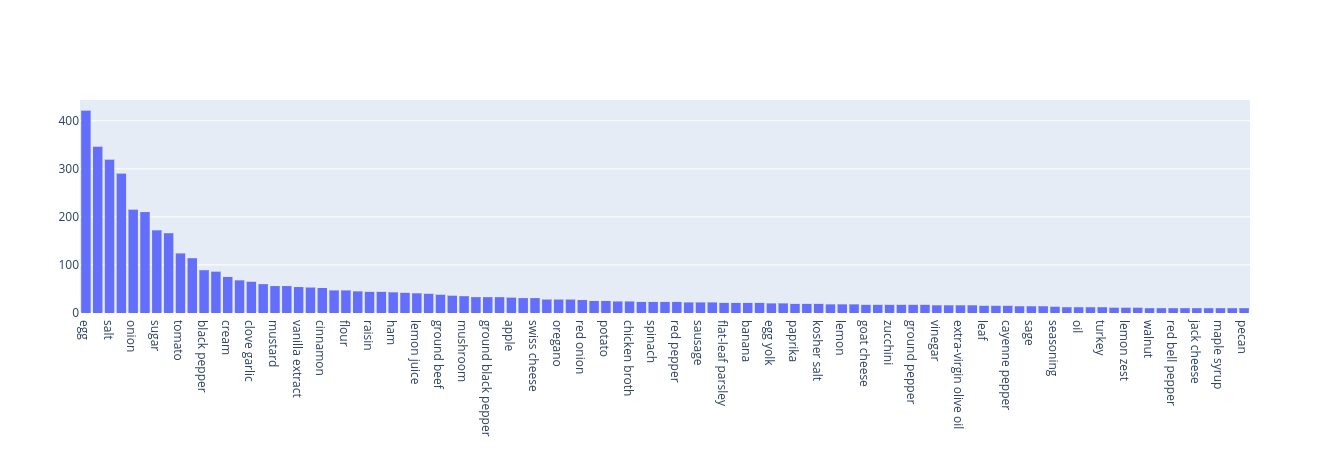

In [4]:
keys, values = EA.m_base_mix.get_adjacent('bread')
data = go.Histogram(x=keys, y=values, histfunc="sum")
iplot([data])

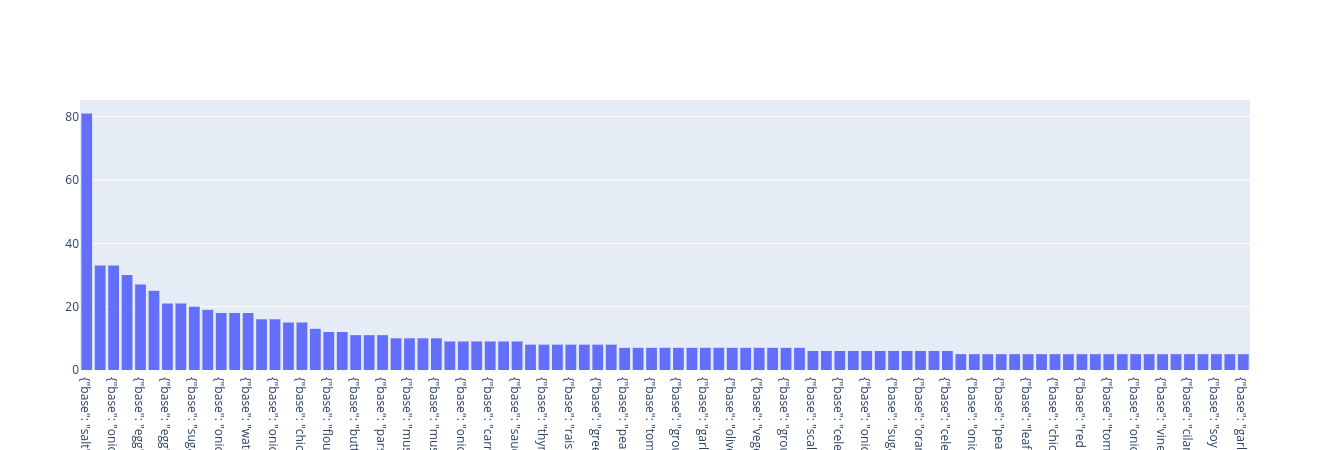

In [5]:
ing = EA.Ingredient("rice")
ing.apply_action("cook")

keys, values = EA.m_mix.get_adjacent(ing.to_json())
data = go.Histogram(x=keys, y=values, histfunc="sum")
iplot([data])

In [6]:
EA.np.sum(values)

920

In [7]:
EA.m_base_mix.get_sum('noodle')

1531

In [8]:
def normalized_score(key, matrix):
    sum_key = matrix.get_sum(key)
    keys, values = matrix.get_adjacent(key)
    normalized_values = EA.np.array([(values[i] / matrix.get_sum(keys[i])) * (values[i] / sum_key) for i in range(len(keys))])
    sort = EA.np.argsort(-normalized_values)
    return keys[sort], normalized_values[sort]
        

In [9]:
def forward_normalized_score(key, matrix):
    sum_key = matrix.get_fw_sum(key)
    keys, values = matrix.get_forward_adjacent(key)
    normalized_values = EA.np.array([(values[i] / matrix.get_bw_sum(keys[i])) * (values[i] / sum_key) for i in range(len(keys))])
    sort = EA.np.argsort(-normalized_values)
    return keys[sort], normalized_values[sort]

In [10]:
def backward_normalized_score(key, matrix):
    sum_key = matrix.get_bw_sum(key)
    keys, values = matrix.get_backward_adjacent(key)
    normalized_values = EA.np.array([(values[i] / matrix.get_fw_sum(keys[i])) * (values[i] / sum_key) for i in range(len(keys))])
    sort = EA.np.argsort(-normalized_values)
    return keys[sort], normalized_values[sort]

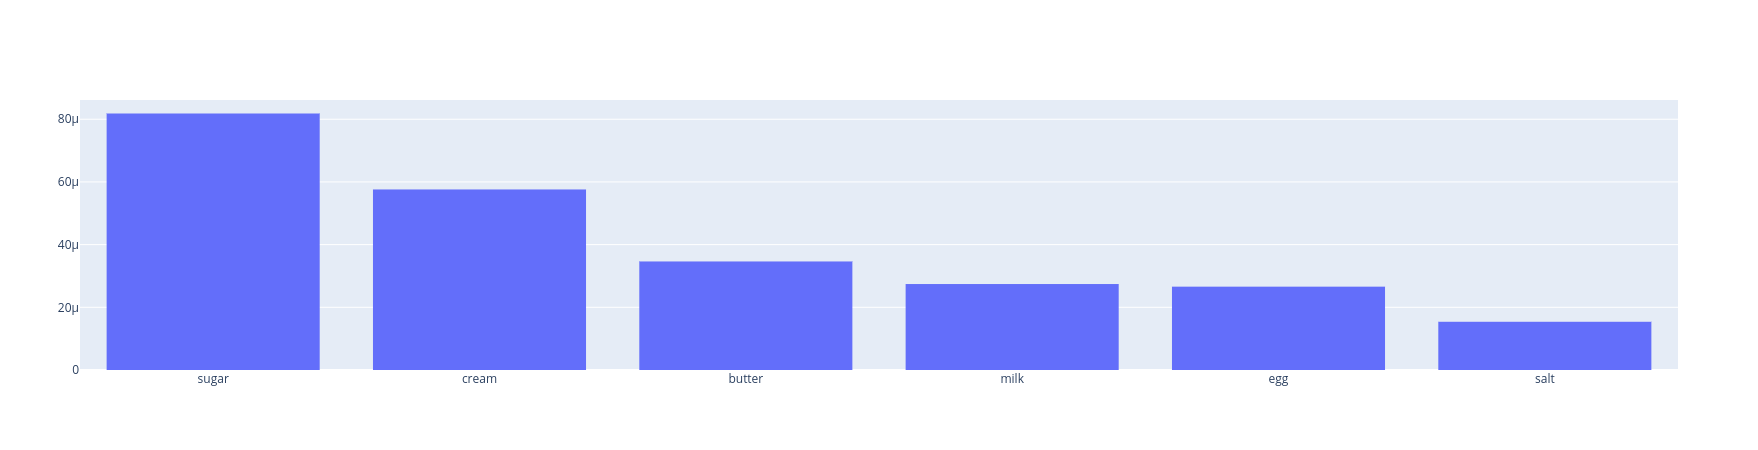

6


In [48]:
keys, values = normalized_score('whiskey', EA.m_base_mix)
data = go.Histogram(x=keys, y=values, histfunc="sum")
iplot([data])
print(len(keys))

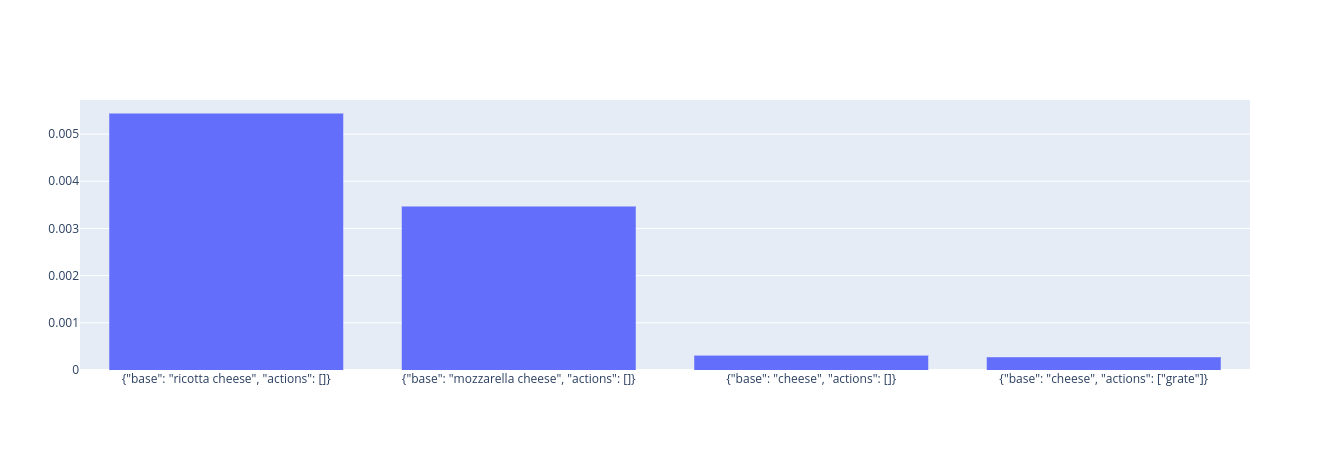

In [12]:
ing = EA.Ingredient("noodle")
ing.apply_action("cook")

keys, values = normalized_score(ing.to_json(), EA.m_mix)
data = go.Histogram(x=keys, y=values, histfunc="sum")
iplot([data])

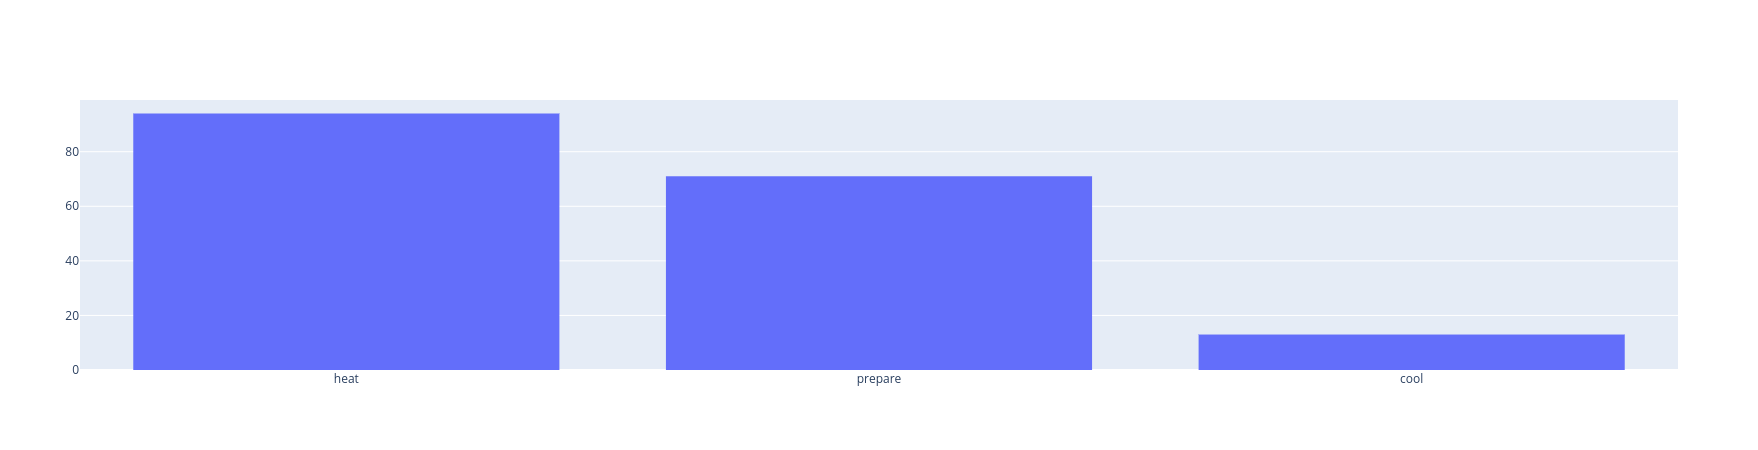

In [78]:
keys, values = EA.m_grouped_act.get_backward_adjacent(EA.Ingredient("bread").to_json())
data = go.Histogram(x=keys, y=values, histfunc="sum")
iplot([data])

In [79]:
def prepare_ratio(ing:str):
    keys, values = EA.m_grouped_act.get_backward_adjacent(EA.Ingredient(ing).to_json())
    action_dict = dict(zip(keys,values))
    return action_dict['prepare'] / action_dict['heat']

In [94]:
prepare_ratio("sugar")

0.405195500803428